## HEART DISEASE PREDICTION USING MACHINE LEARNING

### 1. Introduction

Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow in and out of the heart, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural problems that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths.
Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses.

It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry on heart disease.
In this notebook, I will be exploring different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the [Framingham dataset ](http://biolincc.nhlbi.nih.gov/studies/framcohort/) that is publicly availabe on[ Kaggle ](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset.)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

### 2. Dataset

#### Source:
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

#### Attributes:

###### Demographic:
    Sex: male or female(Nominal)
    Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    
###### Education: no further information provided

###### Behavioral:

    Current Smoker: whether or not the patient is a current smoker (Nominal)
    Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
    
###### Information on medical history:

    BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    Diabetes: whether or not the patient had diabetes (Nominal)
    
###### Information on current medical condition:

    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    Glucose: glucose level (Continuous)
    
###### Target variable to predict:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
#load the data
data = pd.read_csv('data/framingham.csv')
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We drop the education column because it has no correlation with heart disease

### 3. Exploratory Data Analysis

#### 3.1 Missing variables

In [4]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [5]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


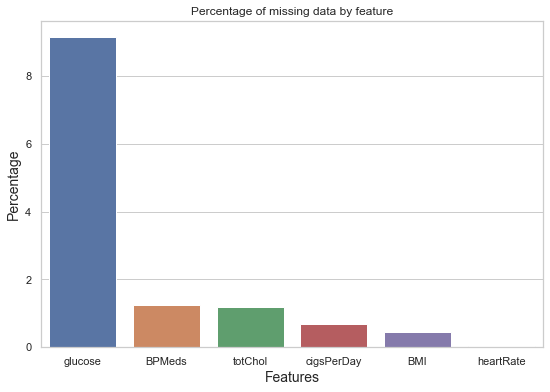

In [6]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

The blood glucose entry has the highest percentage of missing data i.e at 9.15% the rest have very few missing entries.

Since missing entries account for only 12% of the total data we can drop these entries

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.shape

(3751, 15)

#### 3.2 Data Distribution

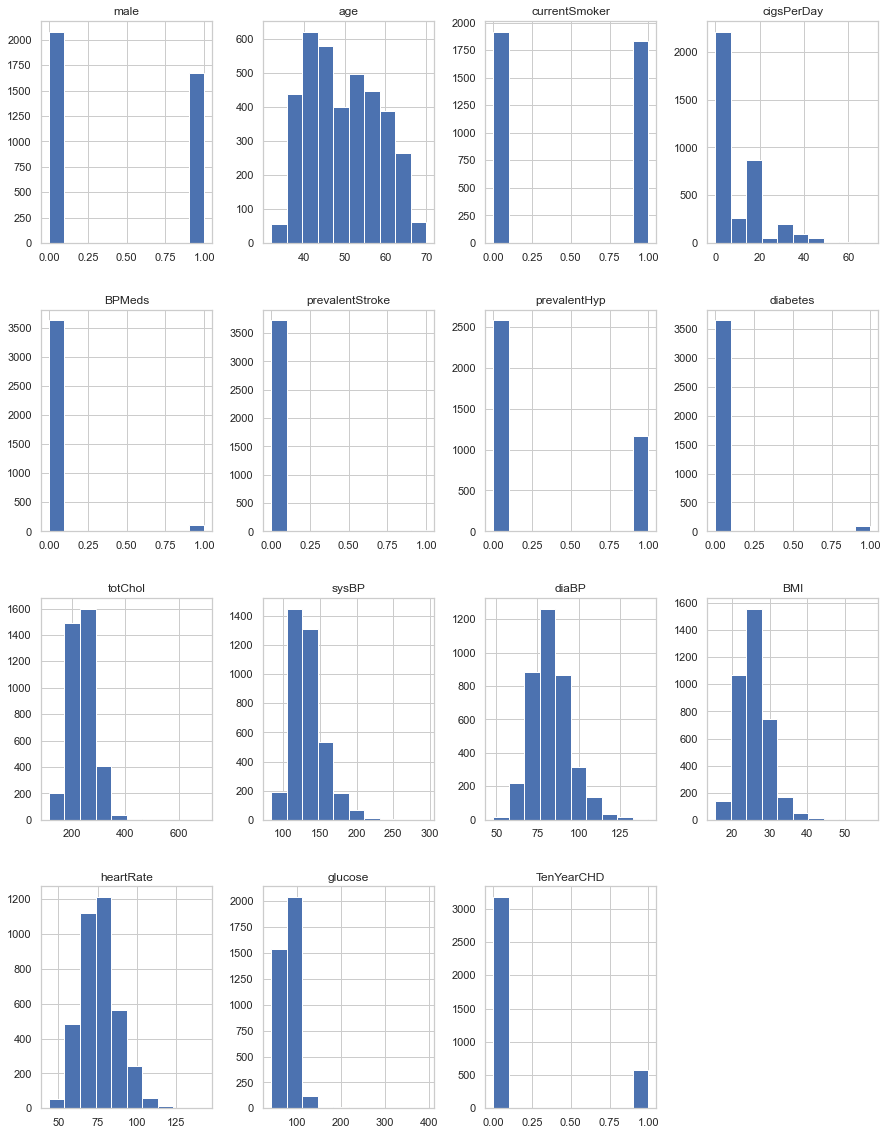

In [9]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced

Case counts

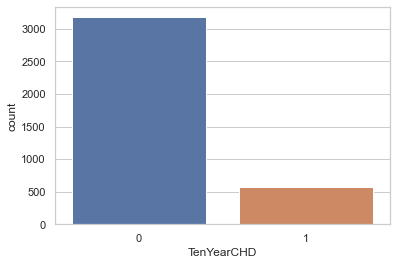

There are 3179 patients without heart disease and 572 patients with the disease


In [10]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

##### 3.3 Number of people who have disease vs age

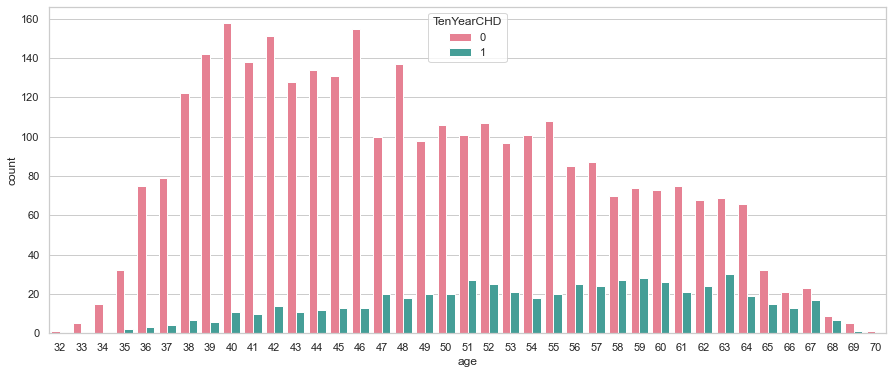

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

The people with the highest risk of developing CHD are betwwen the ages of 51 and 63 i.e. the blue bars 

#### 3.3 Data analysis

In [12]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

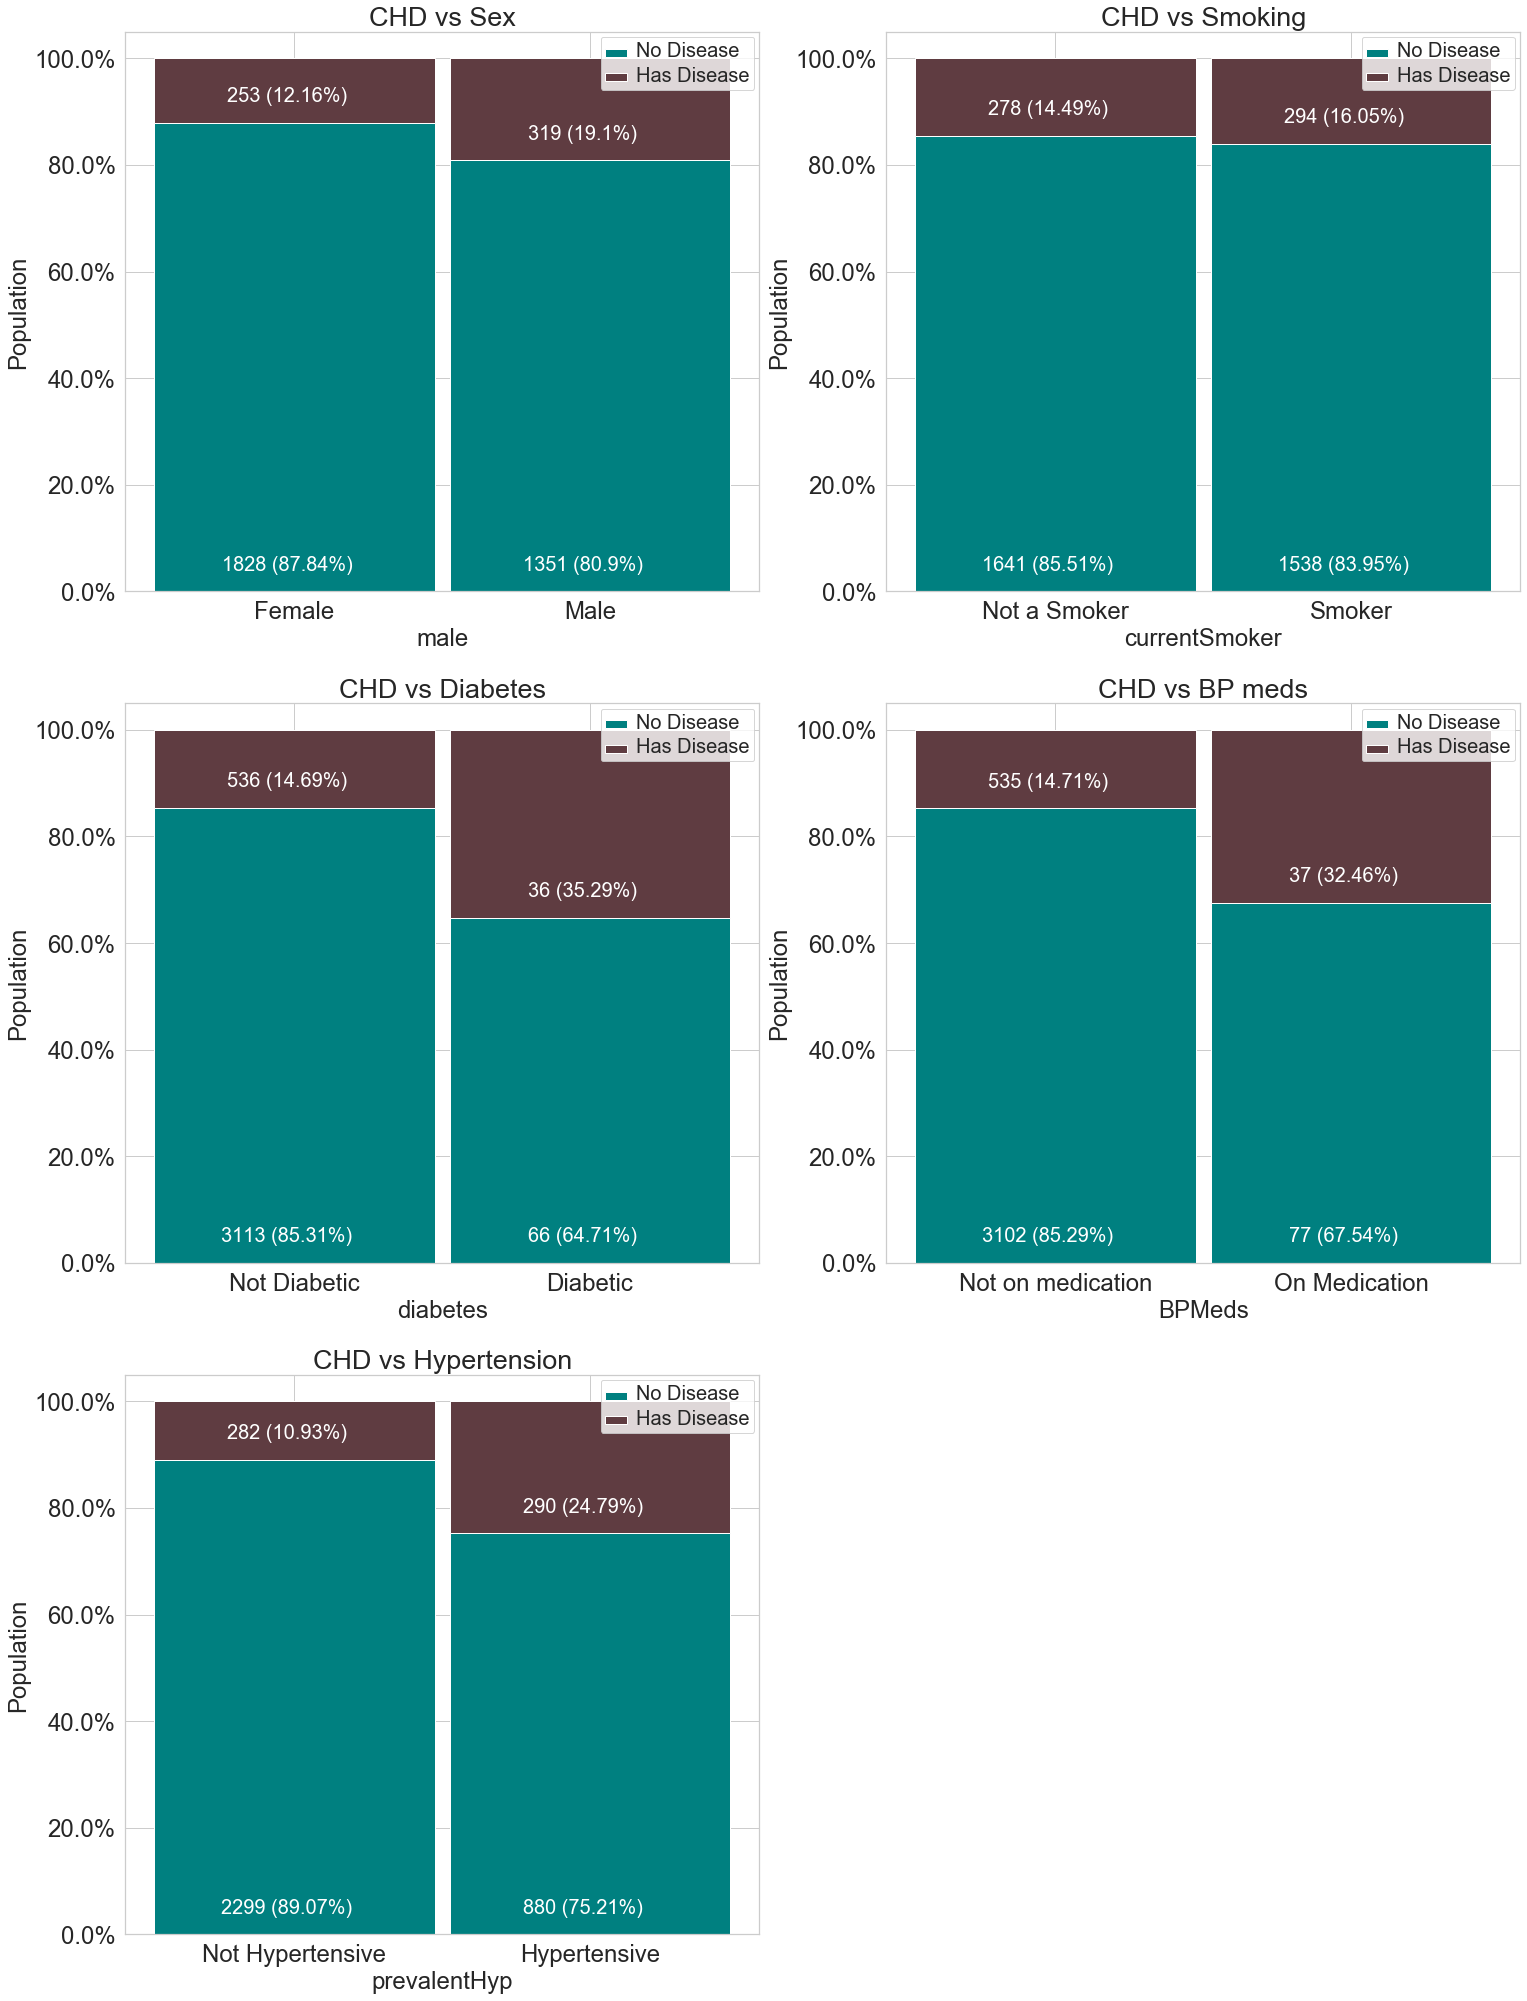

In [13]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

Due to the imbalanced nature of the dataset it is difficult to make conclusions but based on what is observed

    Slightly more males are suffering from CHD than females
    The odds of developing CHD are higher in the hypertensive and diabetic patients and are almost similar between smokers and non smokers

#### 3.5 Correlation Heat map

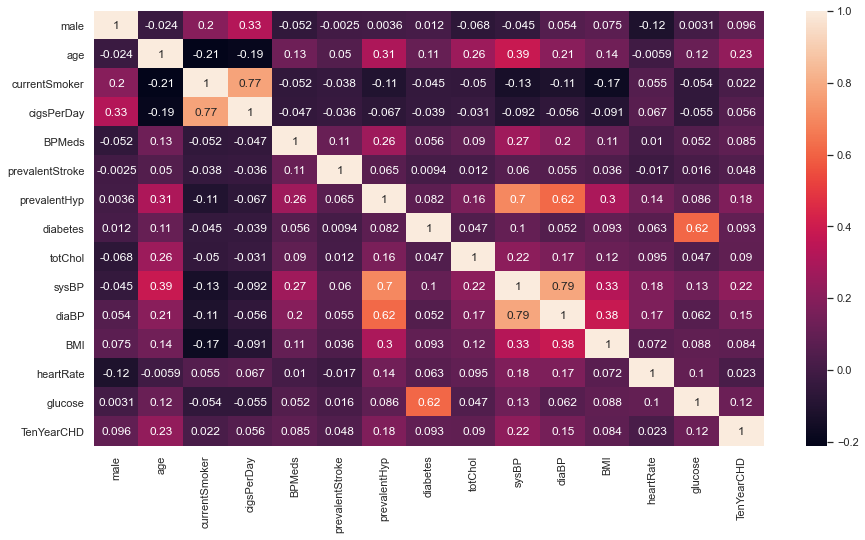

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors.

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best fetaures

### 4 Feature Selection

Here we will use the Boruta algorithm  which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

##### Methodology:

    Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).
    
    Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.
    
    At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.
    
    Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.
    
reference: http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/

In [15]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [16]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=28, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x000001E839B74828>,
                                          verbose=0, warm_start=False),
         max

In [17]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

We see that age and the systolic blood pressures are selected as the most important features for predicting the Ten year risk of developing CHD.

However we will use thee six most important features to build our models

In [18]:
# select the top 6 features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

The top features are:
    1. Age
    2. Total cholesterol
    3. Systolic blood pressure
    4. Diastolic blood pressure
    5. BMI
    6. Heart rate
    7. Blood glucose

#### 4.1 Statistics on the top features

In [19]:
import statsmodels.api as sm

In [20]:
X_top = data[top_features]
y = data['TenYearCHD']

In [21]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                 0.02354
Time:                        22:16:47   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [22]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


Holding all other features constant, the odds of getting diagnosed with heart disease increases with about 2% for every increase in age an systolic blood pressure

The other factors show no significant change

Pair plots

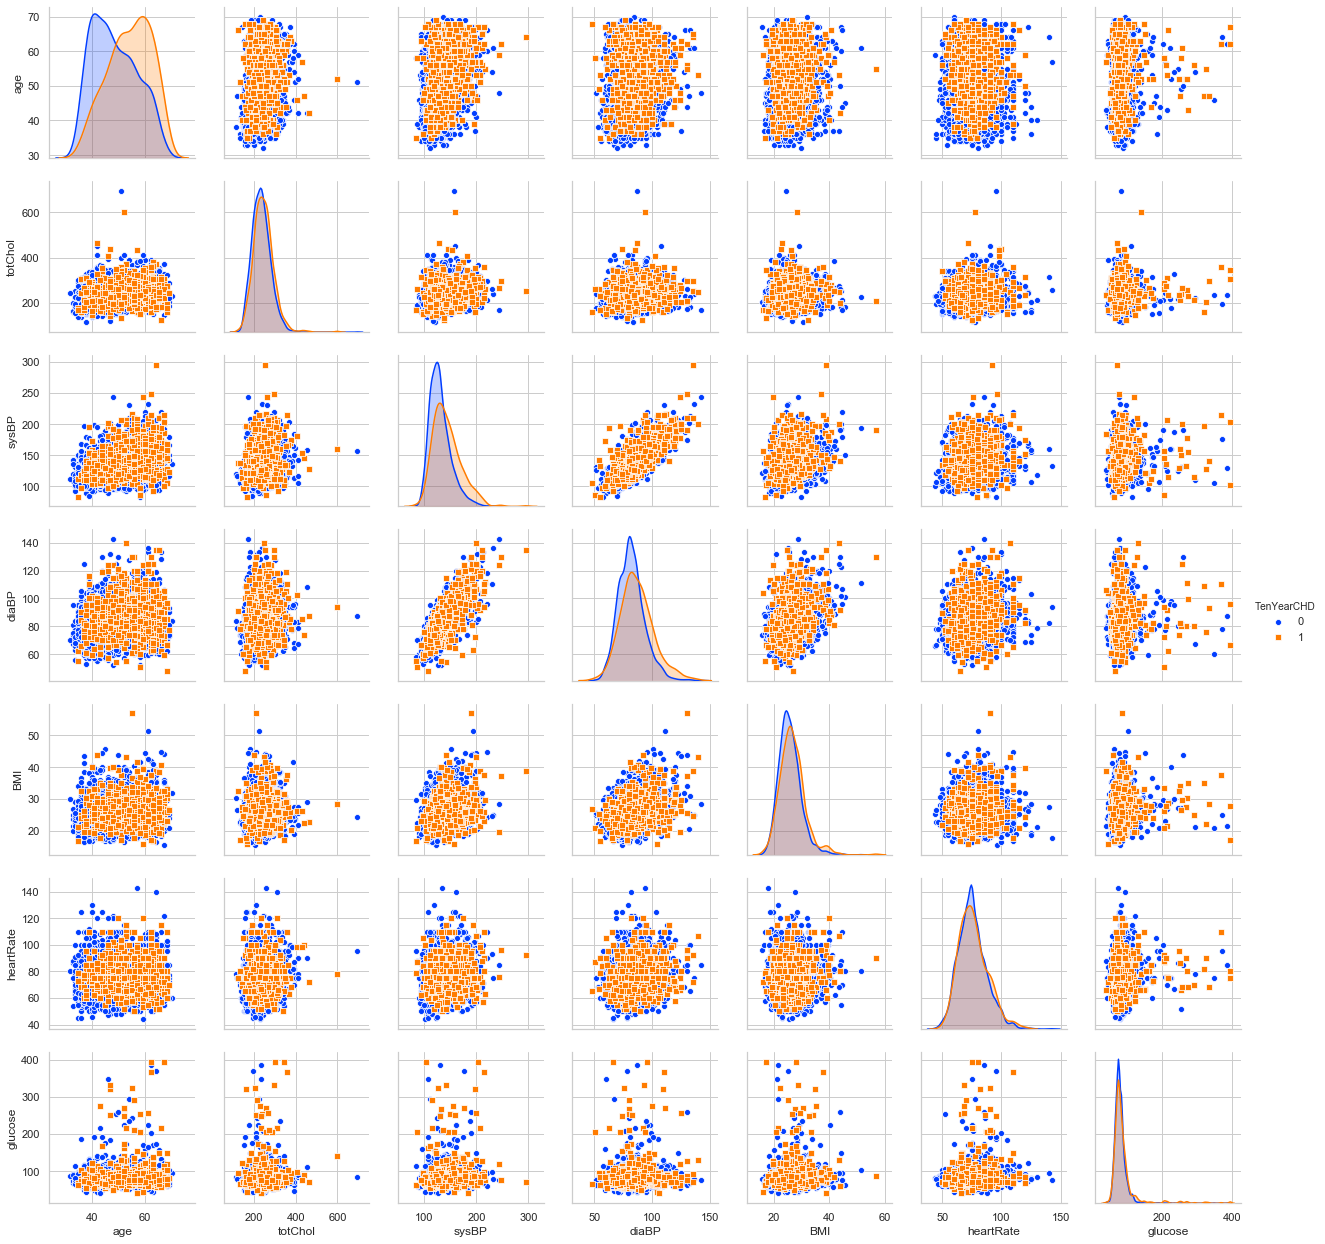

In [23]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features, palette = sns.color_palette("bright", 10))

There are no characteristics that split the data well

### 5. Models and predictions

Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).

##### 5.1 SMOTE

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

This procedure can be used to create as many synthetic examples for the minority class as are required. It suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [25]:
X = data[top_features]
y = data.iloc[:,-1]

In [26]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [27]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


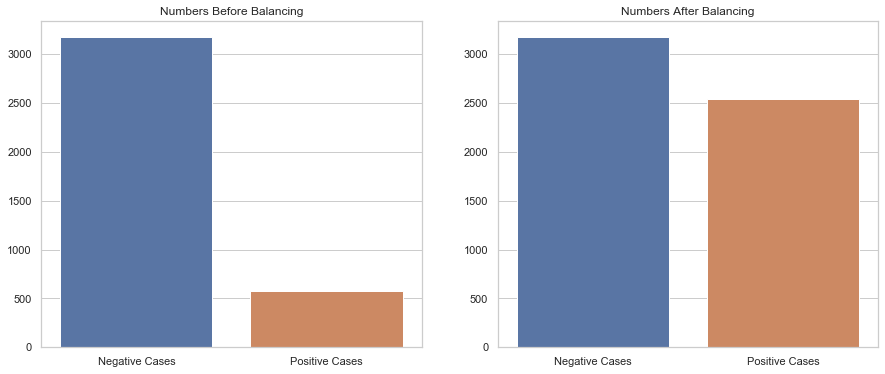

In [28]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

#### 5.2 Splitting data to Training and Testing set 

In [29]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,44.0,205.0,116.0,70.0,21.99,68.0,85.0,0
1,52.0,272.0,118.5,69.0,18.98,70.0,75.0,0
2,62.0,260.0,104.0,69.0,24.02,70.0,93.0,0
3,42.0,182.0,120.0,83.0,27.26,85.0,87.0,0
4,53.0,226.0,139.0,80.0,23.62,72.0,69.0,0


In [30]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,44.0,205.0,116.0,70.0,21.99,68.0,85.0
1,52.0,272.0,118.5,69.0,18.98,70.0,75.0
2,62.0,260.0,104.0,69.0,24.02,70.0,93.0
3,42.0,182.0,120.0,83.0,27.26,85.0,87.0
4,53.0,226.0,139.0,80.0,23.62,72.0,69.0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

##### 5.3 Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#### 5.4 Models

###### 5.4.1 Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [35]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [36]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1'}

In [37]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [38]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 67.6%


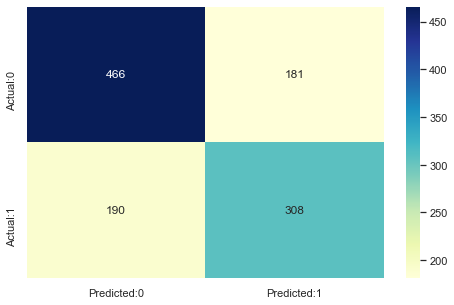

In [39]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [40]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       647
           1       0.63      0.62      0.62       498

    accuracy                           0.68      1145
   macro avg       0.67      0.67      0.67      1145
weighted avg       0.68      0.68      0.68      1145



In [41]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 62.41%


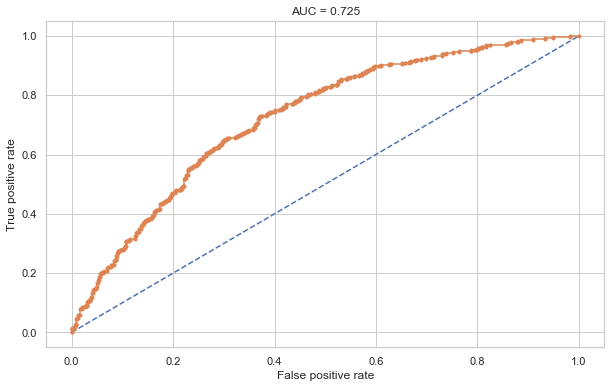

In [42]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

##### 5.4.2 k-Nearest Neighbours

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [45]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [46]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [47]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 82.53%


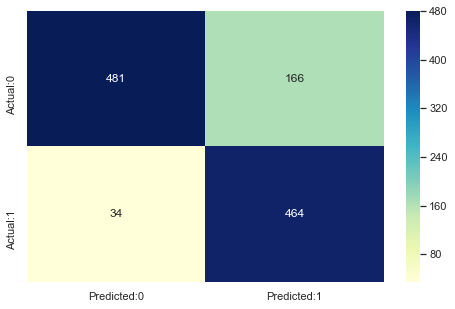

In [48]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [49]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       647
           1       0.74      0.93      0.82       498

    accuracy                           0.83      1145
   macro avg       0.84      0.84      0.83      1145
weighted avg       0.85      0.83      0.83      1145



In [50]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 82.27%


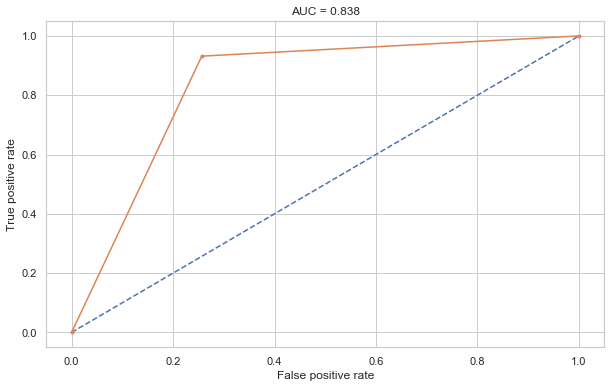

In [51]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

#### 5.4.3 Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [53]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [54]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}

In [55]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [56]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 72.4%


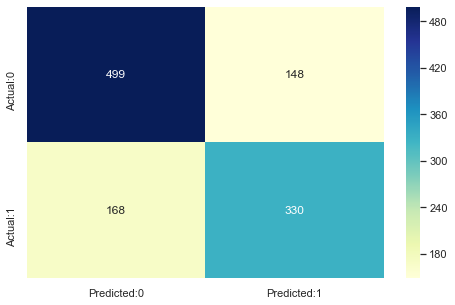

In [57]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       647
           1       0.69      0.66      0.68       498

    accuracy                           0.72      1145
   macro avg       0.72      0.72      0.72      1145
weighted avg       0.72      0.72      0.72      1145



In [59]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 67.62%


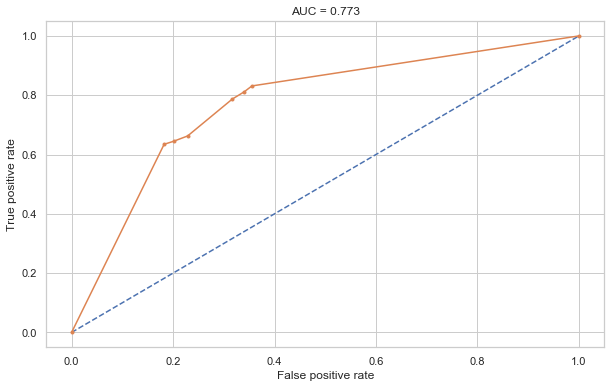

In [60]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

#### 5.4.4 Support Vector Machine

In [61]:
from sklearn.svm import SVC

In [62]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [63]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [64]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [65]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 86.46%


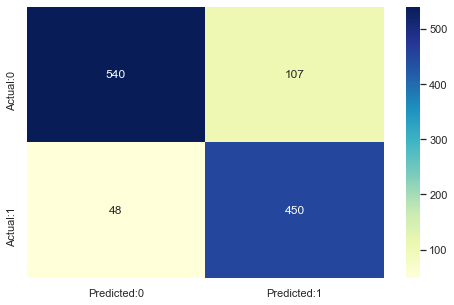

In [66]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [67]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       647
           1       0.81      0.90      0.85       498

    accuracy                           0.86      1145
   macro avg       0.86      0.87      0.86      1145
weighted avg       0.87      0.86      0.87      1145



In [68]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 85.31%


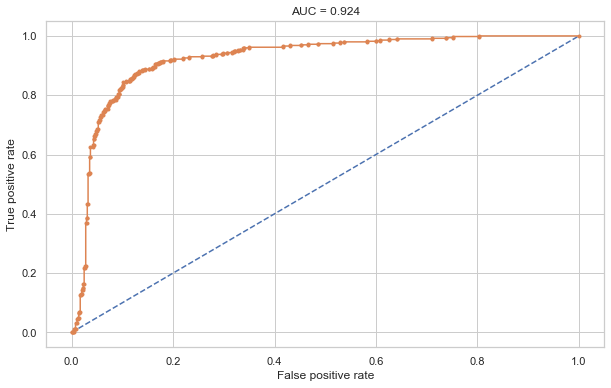

In [69]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

##### 5.5 Model Comparison

In [70]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [71]:
comparison

,AUC,Accuracy,F1 score
Logistic regression,0.725005,0.675983,0.624113
K-nearest neighbours,0.837579,0.825328,0.822695
Decision trees,0.773151,0.724017,0.676230
Support vector machine,0.923620,0.864629,0.853081


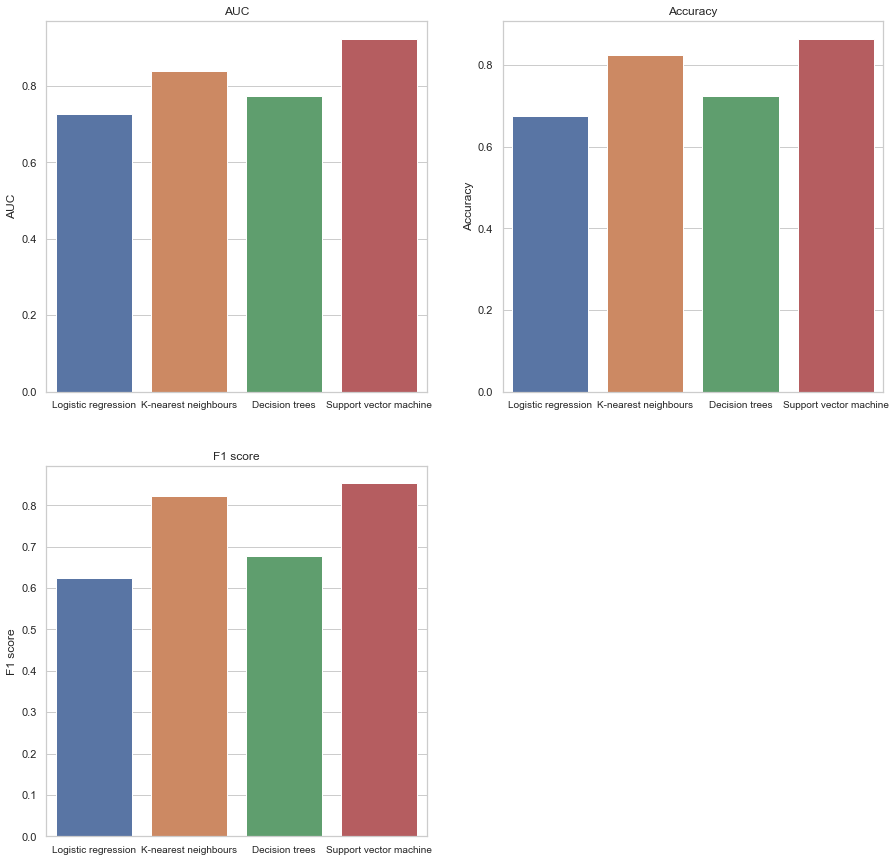

In [72]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

### 6. Conclusion

1. The most important features in predicting the ten year risk of developing CHD were age and systolic blood pressure
1. The Support vector machine with the radial kernel was the best performing model in terms of accuracy and the F1 score. Its high AUC and this shows that it has a high true positive rate.
2. Balancing the dataset by using the smote technique helped in improving the models sensitivity
3. With more data(especially that of the minority class) better models can be built